<a href="https://colab.research.google.com/github/Rishabh5752/MHD-DAIC-/blob/main/DAIC_ML_DL_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the dataset (replace 'merged_data.csv' with your actual dataset file)
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store MSE and R-squared scores
mse_scores = []
r2_scores = []

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse:.4f}, R-squared: {rf_r2:.4f}")
mse_scores.append(rf_mse)
r2_scores.append(rf_r2)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost MSE: {xgb_mse:.4f}, R-squared: {xgb_r2:.4f}")
mse_scores.append(xgb_mse)
r2_scores.append(xgb_r2)

# Support Vector Machines (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM MSE: {svm_mse:.4f}, R-squared: {svm_r2:.4f}")
mse_scores.append(svm_mse)
r2_scores.append(svm_r2)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN MSE: {knn_mse:.4f}, R-squared: {knn_r2:.4f}")
mse_scores.append(knn_mse)
r2_scores.append(knn_r2)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse:.4f}, R-squared: {lr_r2:.4f}")
mse_scores.append(lr_mse)
r2_scores.append(lr_r2)

# AdaBoost Regressor
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
adaboost_r2 = r2_score(y_test, adaboost_predictions)
print(f"AdaBoost MSE: {adaboost_mse:.4f}, R-squared: {adaboost_r2:.4f}")
mse_scores.append(adaboost_mse)
r2_scores.append(adaboost_r2)

# Compare MSE and R-squared scores
best_model_index_mse = mse_scores.index(min(mse_scores))
best_model_index_r2 = r2_scores.index(max(r2_scores))

print("\nBest model based on MSE:", ["Random Forest", "XGBoost", "SVM", "KNN", "Linear Regression", "AdaBoost"][best_model_index_mse])
print("Best model based on R-squared:", ["Random Forest", "XGBoost", "SVM", "KNN", "Linear Regression", "AdaBoost"][best_model_index_r2])

Random Forest MSE: 51.9589, R-squared: -0.2579
XGBoost MSE: 98.0127, R-squared: -1.3729
SVM MSE: 42.3353, R-squared: -0.0249
KNN MSE: 60.1100, R-squared: -0.4553
Linear Regression MSE: 83.5283, R-squared: -1.0222
AdaBoost MSE: 54.1057, R-squared: -0.3099

Best model based on MSE: SVM
Best model based on R-squared: SVM


In [ ]:
#Grid Search CV
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'merged_data.csv' with your actual dataset file)
data = pd.read_csv('merged_data.csv')

# Separate features and target
X = data.drop(['Participant_ID', 'PHQ_8Total'], axis=1).values
y = data['PHQ_8Total'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on test data
best_predictions = best_estimator.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_mse:.4f}")
print(f"Best R-squared: {best_r2:.4f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best MSE: 46.1390
Best R-squared: -0.1170


In [ ]:
data.describe()

,Participant_ID,PHQ_8Total,0,1,2,3,4,5,6,7,...,980,981,982,983,984,985,986,987,988,989
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.0,...,56.00000,56.00000,56.00000,56.0,56.000000,56.000000,56.000000,56.0,56.000000,56.000000
mean,464.071429,4.714286,0.821429,0.821429,0.821429,255.0,1.000000,1.000000,1.000000,255.0,...,0.50000,0.50000,0.50000,255.0,0.785714,0.785714,0.785714,255.0,1.178571,1.178571
std,16.739564,5.466308,6.147009,6.147009,6.147009,0.0,4.752033,4.752033,4.752033,0.0,...,3.03315,3.03315,3.03315,0.0,5.362205,5.362205,5.362205,0.0,7.231515,7.231515
min,436.000000,0.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
25%,449.750000,1.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
50%,464.500000,3.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
75%,478.250000,7.000000,0.000000,0.000000,0.000000,255.0,0.000000,0.000000,0.000000,255.0,...,0.00000,0.00000,0.00000,255.0,0.000000,0.000000,0.000000,255.0,0.000000,0.000000
max,492.000000,19.000000,46.000000,46.000000,46.000000,255.0,30.000000,30.000000,30.000000,255.0,...,22.00000,22.00000,22.00000,255.0,40.000000,40.000000,40.000000,255.0,53.000000,53.000000


In [ ]:
data.head()

,Participant_ID,PHQ_8Total,0,1,2,3,4,5,6,7,...,980,981,982,983,984,985,986,987,988,989
0,436,0,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
1,437,0,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
2,438,2,0,0,0,255,0,0,0,255,...,0,0,0,255,4,4,4,255,0,0
3,439,1,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0
4,440,19,0,0,0,255,0,0,0,255,...,0,0,0,255,0,0,0,255,0,0


   Participant_ID  PHQ_8Total  0  1  2    3  4  5  6    7  ...  980  981  982  \
0             436           0  0  0  0  255  0  0  0  255  ...    0    0    0   
1             437           0  0  0  0  255  0  0  0  255  ...    0    0    0   
2             438           2  0  0  0  255  0  0  0  255  ...    0    0    0   
3             439           1  0  0  0  255  0  0  0  255  ...    0    0    0   
4             440          19  0  0  0  255  0  0  0  255  ...    0    0    0   

   983  984  985  986  987  988  989  
0  255    0    0    0  255    0    0  
1  255    0    0    0  255    0    0  
2  255    4    4    4  255    0    0  
3  255    0    0    0  255    0    0  
4  255    0    0    0  255    0    0  

[5 rows x 992 columns]
       Participant_ID  PHQ_8Total          0          1          2      3  \
count       56.000000   56.000000  56.000000  56.000000  56.000000   56.0   
mean       464.071429    4.714286   0.821429   0.821429   0.821429  255.0   
std         16.739564   

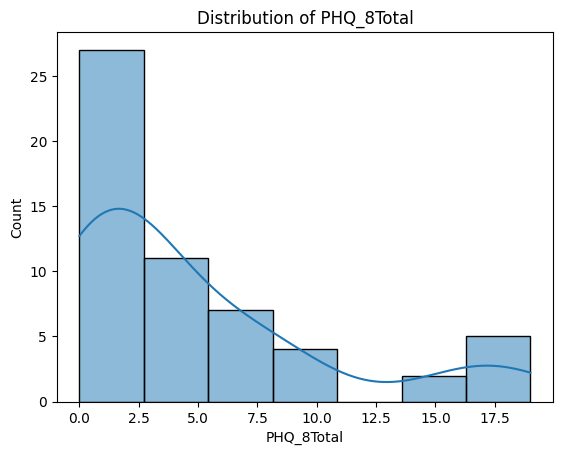

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Replace 'merged_data.csv' with your dataset file)
data = pd.read_csv('merged_data.csv')

# Explore data
print(data.head())  # Display the first few rows
print(data.describe())  # Summary statistics

# Visualize the distribution of 'PHQ_8Total'
sns.histplot(data['PHQ_8Total'], kde=True)
plt.xlabel('PHQ_8Total')
plt.title('Distribution of PHQ_8Total')
plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
import os
import re
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the merged_data.csv with PHQ_8Total scores
data = pd.read_csv('/content/merged_data.csv')

# Root path to the folders containing participant-wise image folders
root_folder_path = '/content/drive/MyDrive/daic_dataset_folder'

# Lists to store image paths and corresponding PHQ_8Total scores
image_paths = []
phq_scores = []

# Traverse through participant folders
for participant_folder in os.listdir(root_folder_path):
    participant_folder_path = os.path.join(root_folder_path, participant_folder)
    if os.path.isdir(participant_folder_path):
        # Extract participant ID from folder name using regular expression
        match = re.search(r'\d+', participant_folder)
        if match:
            participant_id = match.group()
            for filename in os.listdir(participant_folder_path):
                if filename.endswith('.png'):  # Assuming images are in png format
                    image_paths.append(os.path.join(participant_folder_path, filename))
                    # Extract PHQ_8Total score from data based on Participant_ID or any relevant mapping
                    phq_score = data[data['Participant_ID'] == int(participant_id)]['PHQ_8Total'].values
                    if len(phq_score) > 0:
                        phq_scores.append(phq_score[0])

# Load images and convert to arrays
images = []
for img_path in image_paths:
    img = load_img(img_path, target_size=(4, 4))  # Set image height and width
    img_array = img_to_array(img)
    images.append(img_array)

# Convert lists to numpy arrays
images = np.array(images)
phq_scores = np.array(phq_scores)

# Check if images and phq_scores are not empty
print(f"Number of loaded images: {len(images)}")
print(f"Number of PHQ_8Total scores: {len(phq_scores)}")

# If there are images and scores, continue
if len(images) > 0 and len(phq_scores) > 0:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(images, phq_scores, test_size=0.2, random_state=42)

    # Build the CNN model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(4, 4, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout for regularization
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    # Define Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

Number of loaded images: 56
Number of PHQ_8Total scores: 56
Epoch 1/1000
5/5 [==============================] - 2s 65ms/step - loss: 277.3458 - mae: 12.4797 - val_loss: 60.9486 - val_mae: 5.9580
Epoch 2/1000
5/5 [==============================] - 0s 20ms/step - loss: 138.4128 - mae: 9.1931 - val_loss: 60.7855 - val_mae: 5.9583
Epoch 3/1000
5/5 [==============================] - 0s 18ms/step - loss: 118.3500 - mae: 8.1749 - val_loss: 59.6610 - val_mae: 5.7285
Epoch 4/1000
5/5 [==============================] - 0s 18ms/step - loss: 153.7932 - mae: 9.2482 - val_loss: 60.4255 - val_mae: 5.6905
Epoch 5/1000
5/5 [==============================] - 0s 18ms/step - loss: 105.8878 - mae: 7.8989 - val_loss: 59.3953 - val_mae: 5.4913
Epoch 6/1000
5/5 [==============================] - 0s 16ms/step - loss: 97.2683 - mae: 7.9466 - val_loss: 65.3079 - val_mae: 6.0920
Epoch 7/1000
5/5 [==============================] - 0s 17ms/step - loss: 94.6181 - mae: 7.6951 - val_loss: 70.8771 - val_mae: 6.7255
Epo

In [30]:
import pandas as pd
import numpy as np
import os
import re
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the merged_data.csv with PHQ_8Total scores
data = pd.read_csv('/content/merged_data.csv')

# Root path to the folders containing participant-wise image folders
root_folder_path = '/content/drive/MyDrive/daic_dataset_folder'

# Lists to store image paths and corresponding PHQ_8Total scores
image_paths = []
phq_scores = []

# Traverse through participant folders
for participant_folder in os.listdir(root_folder_path):
    participant_folder_path = os.path.join(root_folder_path, participant_folder)
    if os.path.isdir(participant_folder_path):
        # Extract participant ID from folder name using regular expression
        match = re.search(r'\d+', participant_folder)
        if match:
            participant_id = match.group()
            for filename in os.listdir(participant_folder_path):
                if filename.endswith('.png'):  # Assuming images are in png format
                    image_paths.append(os.path.join(participant_folder_path, filename))
                    # Extract PHQ_8Total score from data based on Participant_ID or any relevant mapping
                    phq_score = data[data['Participant_ID'] == int(participant_id)]['PHQ_8Total'].values
                    if len(phq_score) > 0:
                        phq_scores.append(phq_score[0])

# Load images and convert to arrays
images = []
for img_path in image_paths:
    img = load_img(img_path, target_size=(4, 4))  # Set image height and width
    img_array = img_to_array(img)
    images.append(img_array)

# Convert lists to numpy arrays
images = np.array(images)
phq_scores = np.array(phq_scores)

# Check if images and phq_scores are not empty
print(f"Number of loaded images: {len(images)}")
print(f"Number of PHQ_8Total scores: {len(phq_scores)}")

# If there are images and scores, continue
if len(images) > 0 and len(phq_scores) > 0:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(images, phq_scores, test_size=0.2, random_state=42)

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
    )

    # Build the CNN model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(4, 4, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout for regularization
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    # Define Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Train the model with augmented data
    history = model.fit(datagen.flow(X_train, y_train, batch_size=10),
                        steps_per_epoch=len(X_train) / 10,
                        epochs=1000,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping])

Number of loaded images: 56
Number of PHQ_8Total scores: 56
Epoch 1/1000
4/4 [==============================] - 2s 173ms/step - loss: 127.8890 - mae: 9.0974 - val_loss: 62.5774 - val_mae: 6.2237
Epoch 2/1000
4/4 [==============================] - 0s 27ms/step - loss: 93.9452 - mae: 7.4780 - val_loss: 62.4132 - val_mae: 5.9035
Epoch 3/1000
4/4 [==============================] - 0s 27ms/step - loss: 159.6819 - mae: 9.7566 - val_loss: 60.6312 - val_mae: 5.8496
Epoch 4/1000
4/4 [==============================] - 0s 25ms/step - loss: 78.5687 - mae: 7.2562 - val_loss: 62.7026 - val_mae: 5.8792
Epoch 5/1000
4/4 [==============================] - 0s 28ms/step - loss: 80.6762 - mae: 6.8516 - val_loss: 64.9210 - val_mae: 5.8728
Epoch 6/1000
4/4 [==============================] - 0s 24ms/step - loss: 96.7028 - mae: 7.4290 - val_loss: 65.8621 - val_mae: 6.2581
Epoch 7/1000
4/4 [==============================] - 0s 24ms/step - loss: 71.4806 - mae: 6.4128 - val_loss: 66.2196 - val_mae: 6.2717
Epoch 

In [31]:
# Save the model to a file
model.save('DAICDL_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


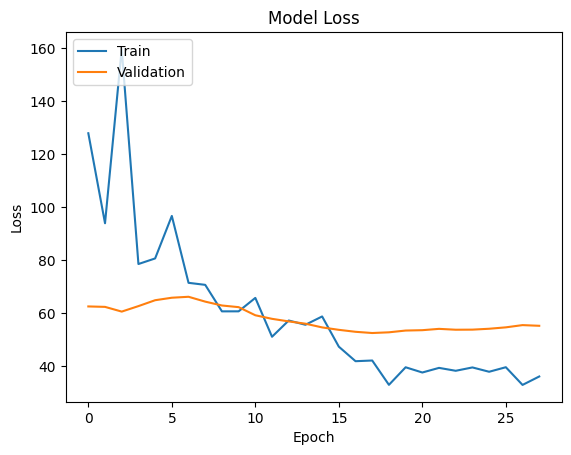

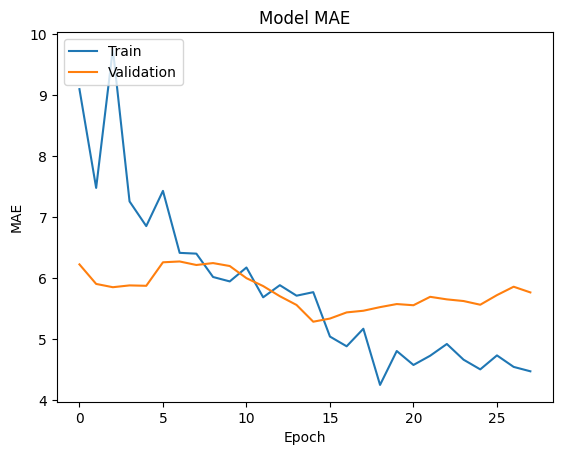

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation MAE (mean absolute error) values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
!pip install librosa
!pip install soundfile

In [39]:
import pandas as pd
import numpy as np
import os
import re
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the merged_data.csv with PHQ_8Total scores
data = pd.read_csv('/content/merged_data.csv')

# Root path to the folders containing participant-wise audio files
root_folder_path = '/content/drive/MyDrive/daic_dataset_folder'

# Lists to store audio features and corresponding PHQ_8Total scores
audio_features = []
phq_scores = []

# Traverse through participant folders
for participant_folder in os.listdir(root_folder_path):
    participant_folder_path = os.path.join(root_folder_path, participant_folder)
    if os.path.isdir(participant_folder_path):
        # Extract participant ID from folder name using regular expression
        match = re.search(r'\d+', participant_folder)
        if match:
            participant_id = match.group()
            for filename in os.listdir(participant_folder_path):
                if filename.endswith('.wav'):  # Assuming audio files are in .wav format
                    # Load audio file and extract features
                    audio_file_path = os.path.join(participant_folder_path, filename)
                    audio, sr = librosa.load(audio_file_path)
                    audio_feature = librosa.feature.mfcc(y=audio, sr=sr)
                    # Store the mean of the features
                    audio_features.append(np.mean(audio_feature))
                    # Extract PHQ_8Total score from data based on Participant_ID or any relevant mapping
                    phq_score = data[data['Participant_ID'] == int(participant_id)]['PHQ_8Total'].values
                    if len(phq_score) > 0:
                        phq_scores.append(phq_score[0])

# Convert lists to numpy arrays
audio_features = np.array(audio_features).reshape(-1, 1)  # Reshape to make it a 2D array
phq_scores = np.array(phq_scores)

# Check if audio features and phq_scores are not empty
print(f"Number of audio features: {len(audio_features)}")
print(f"Number of PHQ_8Total scores: {len(phq_scores)}")

# If there are audio features and scores, continue
if len(audio_features) > 0 and len(phq_scores) > 0:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(audio_features, phq_scores, test_size=0.2, random_state=42)

    # Build the model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(1,)))  # Reshaped input shape
    model.add(Dropout(0.5))  # Add dropout for regularization
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    # Define Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=10,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])

Number of audio features: 56
Number of PHQ_8Total scores: 56
Epoch 1/1000
5/5 [==============================] - 1s 45ms/step - loss: 70.4379 - mae: 6.1876 - val_loss: 52.4470 - val_mae: 4.5774
Epoch 2/1000
5/5 [==============================] - 0s 15ms/step - loss: 47.6170 - mae: 5.3927 - val_loss: 48.0666 - val_mae: 4.6437
Epoch 3/1000
5/5 [==============================] - 0s 15ms/step - loss: 63.0730 - mae: 6.0043 - val_loss: 45.5999 - val_mae: 4.7684
Epoch 4/1000
5/5 [==============================] - 0s 11ms/step - loss: 61.7933 - mae: 5.8749 - val_loss: 44.0891 - val_mae: 4.9287
Epoch 5/1000
5/5 [==============================] - 0s 11ms/step - loss: 51.8137 - mae: 5.5472 - val_loss: 43.2286 - val_mae: 5.1048
Epoch 6/1000
5/5 [==============================] - 0s 14ms/step - loss: 52.3648 - mae: 5.3809 - val_loss: 43.0133 - val_mae: 5.1790
Epoch 7/1000
5/5 [==============================] - 0s 13ms/step - loss: 45.0516 - mae: 5.4487 - val_loss: 42.9813 - val_mae: 5.1937
Epoch 8/

In [40]:
# Save the model to a file
model.save('DAICDL_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
import pandas as pd
import numpy as np
import os
import re
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the merged_data.csv with PHQ_8Total scores
data = pd.read_csv('/content/merged_data.csv')

# Root path to the folders containing participant-wise audio files
root_folder_path = '/content/drive/MyDrive/daic_dataset_folder'

# Lists to store audio features and corresponding PHQ_8Total scores
audio_features = []
phq_scores = []

# Traverse through participant folders
for participant_folder in os.listdir(root_folder_path):
    participant_folder_path = os.path.join(root_folder_path, participant_folder)
    if os.path.isdir(participant_folder_path):
        # Extract participant ID from folder name using regular expression
        match = re.search(r'\d+', participant_folder)
        if match:
            participant_id = match.group()
            for filename in os.listdir(participant_folder_path):
                if filename.endswith('.wav'):  # Assuming audio files are in .wav format
                    # Load audio file and extract features
                    audio_file_path = os.path.join(participant_folder_path, filename)
                    audio, sr = librosa.load(audio_file_path)
                    audio_feature = librosa.feature.mfcc(y=audio, sr=sr)
                    # Store the mean of the features
                    audio_features.append(np.mean(audio_feature))
                    # Extract PHQ_8Total score from data based on Participant_ID or any relevant mapping
                    phq_score = data[data['Participant_ID'] == int(participant_id)]['PHQ_8Total'].values
                    if len(phq_score) > 0:
                        phq_scores.append(phq_score[0])

# Convert lists to numpy arrays
audio_features = np.array(audio_features).reshape(-1, 1)  # Reshape to make it a 2D array
phq_scores = np.array(phq_scores)

# Check if audio features and phq_scores are not empty
print(f"Number of audio features: {len(audio_features)}")
print(f"Number of PHQ_8Total scores: {len(phq_scores)}")

# If there are audio features and scores, continue
if len(audio_features) > 0 and len(phq_scores) > 0:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(audio_features, phq_scores, test_size=0.2, random_state=42)

    # Build the model with additional hidden layers
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(1,)))  # Reshaped input shape
    model.add(Dense(128, activation='relu'))  # Additional hidden layer
    model.add(Dropout(0.5))  # Add dropout for regularization
    model.add(Dense(64, activation='relu'))  # Additional hidden layer
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    # Define Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=1000, batch_size=10,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])

Number of audio features: 56
Number of PHQ_8Total scores: 56
Epoch 1/1000
5/5 [==============================] - 2s 65ms/step - loss: 46.7581 - mae: 4.6859 - val_loss: 47.7553 - val_mae: 4.6578
Epoch 2/1000
5/5 [==============================] - 0s 21ms/step - loss: 28.8946 - mae: 3.8294 - val_loss: 42.8602 - val_mae: 5.3076
Epoch 3/1000
5/5 [==============================] - 0s 19ms/step - loss: 29.5119 - mae: 4.3095 - val_loss: 42.9255 - val_mae: 5.4160
Epoch 4/1000
5/5 [==============================] - 0s 19ms/step - loss: 32.2758 - mae: 4.3962 - val_loss: 43.0757 - val_mae: 5.4898
Epoch 5/1000
5/5 [==============================] - 0s 19ms/step - loss: 30.4618 - mae: 4.5367 - val_loss: 42.8738 - val_mae: 5.3635
Epoch 6/1000
5/5 [==============================] - 0s 19ms/step - loss: 25.7924 - mae: 4.0800 - val_loss: 43.2338 - val_mae: 5.1083
Epoch 7/1000
5/5 [==============================] - 0s 15ms/step - loss: 27.1649 - mae: 3.9018 - val_loss: 43.8593 - val_mae: 4.9704
Epoch 8/

In [42]:
# Save the model to a file
model.save('DAICDL_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
import pandas as pd
import numpy as np
import os
import re
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the merged_data.csv with PHQ_8Total scores
data = pd.read_csv('/content/merged_data.csv')

# Root path to the folders containing participant-wise audio files
root_folder_path = '/content/drive/MyDrive/daic_dataset_folder'

# Lists to store audio features and corresponding PHQ_8Total scores
audio_features = []
phq_scores = []

# Traverse through participant folders
for participant_folder in os.listdir(root_folder_path):
    participant_folder_path = os.path.join(root_folder_path, participant_folder)
    if os.path.isdir(participant_folder_path):
        # Extract participant ID from folder name using regular expression
        match = re.search(r'\d+', participant_folder)
        if match:
            participant_id = match.group()
            for filename in os.listdir(participant_folder_path):
                if filename.endswith('.wav'):  # Assuming audio files are in .wav format
                    # Load audio file and extract features
                    audio_file_path = os.path.join(participant_folder_path, filename)
                    audio, sr = librosa.load(audio_file_path)
                    audio_feature = librosa.feature.mfcc(y=audio, sr=sr)
                    # Store the mean of the features
                    audio_features.append(np.mean(audio_feature))
                    # Extract PHQ_8Total score from data based on Participant_ID or any relevant mapping
                    phq_score = data[data['Participant_ID'] == int(participant_id)]['PHQ_8Total'].values
                    if len(phq_score) > 0:
                        phq_scores.append(phq_score[0])

# Convert lists to numpy arrays
audio_features = np.array(audio_features).reshape(-1, 1)  # Reshape to make it a 2D array
phq_scores = np.array(phq_scores)

# Check if audio features and phq_scores are not empty
print(f"Number of audio features: {len(audio_features)}")
print(f"Number of PHQ_8Total scores: {len(phq_scores)}")

# If there are audio features and scores, continue
if len(audio_features) > 0 and len(phq_scores) > 0:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(audio_features, phq_scores, test_size=0.2, random_state=42)

    # Initialize RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    rf.fit(X_train, y_train)

    # Predict on validation set
    predictions = rf.predict(X_val)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, predictions)
    mae = mean_absolute_error(y_val, predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")

Number of audio features: 56
Number of PHQ_8Total scores: 56
Mean Squared Error (MSE): 46.419875
Mean Absolute Error (MAE): 5.510833333333333


In [44]:
# Save the model to a file
model.save('DAICDL_4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
import pandas as pd
import numpy as np
import os
import re
import librosa
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the merged_data.csv with PHQ_8Total scores
data = pd.read_csv('/content/merged_data.csv')

# Root path to the folders containing participant-wise audio files
root_folder_path = '/content/drive/MyDrive/daic_dataset_folder'

# Lists to store audio features and corresponding PHQ_8Total scores
audio_features = []
phq_scores = []

# Traverse through participant folders
for participant_folder in os.listdir(root_folder_path):
    participant_folder_path = os.path.join(root_folder_path, participant_folder)
    if os.path.isdir(participant_folder_path):
        # Extract participant ID from folder name using regular expression
        match = re.search(r'\d+', participant_folder)
        if match:
            participant_id = match.group()
            for filename in os.listdir(participant_folder_path):
                if filename.endswith('.wav'):  # Assuming audio files are in .wav format
                    # Load audio file and extract features
                    audio_file_path = os.path.join(participant_folder_path, filename)
                    audio, sr = librosa.load(audio_file_path)
                    audio_feature = librosa.feature.mfcc(y=audio, sr=sr)
                    # Store the mean of the features
                    audio_features.append(np.mean(audio_feature))
                    # Extract PHQ_8Total score from data based on Participant_ID or any relevant mapping
                    phq_score = data[data['Participant_ID'] == int(participant_id)]['PHQ_8Total'].values
                    if len(phq_score) > 0:
                        phq_scores.append(phq_score[0])

# Convert lists to numpy arrays
audio_features = np.array(audio_features).reshape(-1, 1)  # Reshape to make it a 2D array
phq_scores = np.array(phq_scores)

# Check if audio features and phq_scores are not empty
print(f"Number of audio features: {len(audio_features)}")
print(f"Number of PHQ_8Total scores: {len(phq_scores)}")

# If there are audio features and scores, continue
if len(audio_features) > 0 and len(phq_scores) > 0:
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(audio_features, phq_scores, test_size=0.2, random_state=42)

    # Define a list of models with their respective hyperparameters for GridSearchCV
    models = [
        {
            'model': LinearRegression(),
            'params': {}
        },
        {
            'model': SVR(),
            'params': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
        },
        {
            'model': RandomForestRegressor(),
            'params': {'n_estimators': [50, 100, 200]}
        },
        {
            'model': GradientBoostingRegressor(),
            'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
        }
    ]

    for model in models:
        regressor = model['model']
        grid = GridSearchCV(regressor, model['params'], cv=5, scoring='neg_mean_squared_error', verbose=1)
        grid.fit(X_train, y_train)

        print(f"Best parameters for {regressor.__class__.__name__}:")
        print(grid.best_params_)

        # Predict on validation set using the best model
        best_model = grid.best_estimator_
        predictions = best_model.predict(X_val)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)

        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Mean Absolute Error (MAE): {mae}")

Number of audio features: 56
Number of PHQ_8Total scores: 56
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for LinearRegression:
{}
Mean Squared Error (MSE): 42.69190216677291
Mean Absolute Error (MAE): 5.333940863609314
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVR:
{'C': 0.1, 'kernel': 'rbf'}
Mean Squared Error (MSE): 44.42337128576897
Mean Absolute Error (MAE): 4.657936528955923
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for RandomForestRegressor:
{'n_estimators': 50}
Mean Squared Error (MSE): 49.568233333333346
Mean Absolute Error (MAE): 5.655
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for GradientBoostingRegressor:
{'learning_rate': 0.01, 'n_estimators': 50}
Mean Squared Error (MSE): 40.53430405869713
Mean Absolute Error (MAE): 5.290244483976046
